In [19]:
from imblearn.over_sampling import SMOTE
from sklearn import model_selection, preprocessing
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_auc_score, plot_roc_curve, confusion_matrix, roc_curve, classification_report, fbeta_score, accuracy_score



In [89]:
X = pd.read_csv('X.csv')
y = pd.read_csv('y.csv')

xTrain, xTest, yTrain, yTest = model_selection.train_test_split(X, y, train_size = 0.8, random_state=42)


oversample = SMOTE()
xTrain_smote, yTrain_smote = oversample.fit_resample(xTrain, yTrain)

scaler = preprocessing.StandardScaler()
scaler.fit(xTrain_smote)
nor_xTrain_smote = scaler.transform(xTrain_smote)
nor_xTest = scaler.transform(xTest)

In [98]:
model = LogisticRegression(max_iter = 1000)
model.fit(nor_xTrain_smote, np.ravel(yTrain_smote))
y_hat = model.predict(nor_xTest)

In [100]:
accuracy_score(yTest, y_hat)

0.8127547086683555

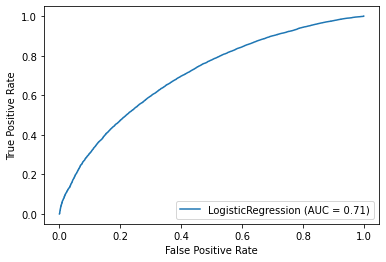

In [104]:
plot_roc_curve(model, nor_xTest, yTest)

In [105]:
#F Beta score
fbeta_score(yTest, y_hat, beta=0.5)

0.8463198551375684

In [106]:
confusion_matrix(yTest, y_hat)

array([[  346,  8228],
       [  272, 36549]])

In [107]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [108]:
model = GaussianNB()
model.fit(nor_xTrain_smote, np.ravel(yTrain_smote))
y_hat = model.predict(nor_xTrain_smote)


In [109]:
accuracy_score(yTrain_smote, y_hat)

0.6957435574599435

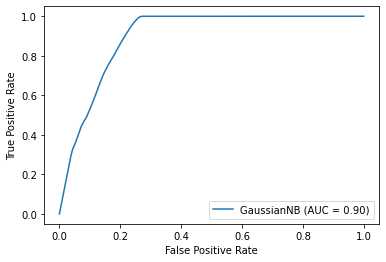

In [110]:
plot_roc_curve(model, nor_xTrain_smote, yTrain_smote)

In [111]:
#F Beta score
fbeta_score(yTrain_smote, y_hat, beta=0.5)

0.7346470290765871

In [88]:
confusion_matrix(yTest, y_hat)

array([[ 5662,  2912],
       [19470, 17351]])